In [1]:
# importing the libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPool2D
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing the MNIST dataset
from keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print("X train shape : ", X_train.shape)
print("y train shape : ", y_train.shape)
print("X test shape : ", X_test.shape)
print("y test shape : ", y_test.shape)

X train shape :  (60000, 28, 28)
y train shape :  (60000,)
X test shape :  (10000, 28, 28)
y test shape :  (10000,)


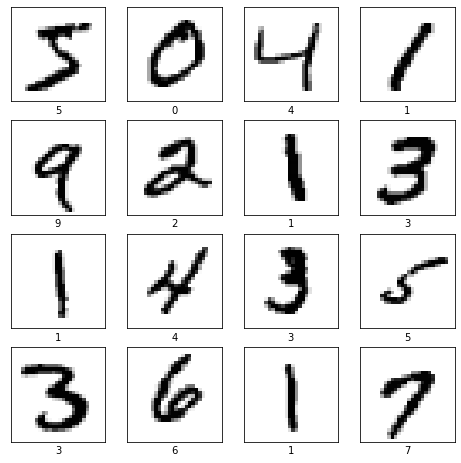

In [4]:
# let's plot some training images
plt.figure(figsize = (8, 8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_train[i], cmap = 'binary')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_train[i])

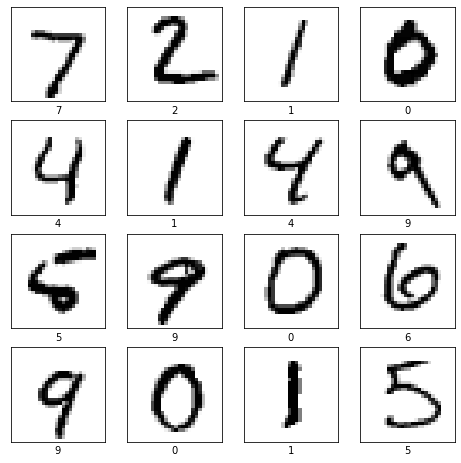

In [5]:
# let's plot some testing images
plt.figure(figsize = (8, 8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_test[i], cmap = 'binary')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_test[i])

In [6]:
# lets normalize the inputs from 0-255 to 0-1

X_train = X_train / 255
X_test = X_test / 255

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
# let's reshape X_train and X_test to include channel dim too
# format : [no of training samples][width][height][no of channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

In [9]:
print(X_train[0].shape)
#print(X_train[0])

(28, 28, 1)


In [10]:
print(y_train.shape)
print(y_train[0])

(60000,)
5


In [11]:
# one hot encoding outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [12]:
print("number of output classes : ", num_classes)
print(y_train.shape)
print(y_train[0])

number of output classes :  10
(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [15]:
# baseline model.

model = Sequential()
# input layer
model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, activation = 'relu', input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(num_classes, activation = 'softmax'))    

In [16]:
# summary of the model.

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               692352    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [17]:
# lets compile the model

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
# lets fit the model on training data.

history = model.fit(X_train, y_train, epochs = 5, batch_size = 128, verbose = 1, callbacks = [tensorboard_callback])

Epoch 1/5
  1/469 [..............................] - ETA: 0s - loss: 3.2640 - accuracy: 0.1719WARNING:tensorflow:From C:\Users\vinee\anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
469/469 [==============================] - 57s 122ms/step - loss: 0.1822 - accuracy: 0.9450
Epoch 2/5
469/469 [==============================] - 54s 116ms/step - loss: 0.0675 - accuracy: 0.9791
Epoch 3/5
469/469 [==============================] - 53s 113ms/step - loss: 0.0428 - accuracy: 0.9864
Epoch 4/5
469/469 [==============================] - 59s 125ms/step - loss: 0.0330 - accuracy: 0.9891
Epoch 5/5
469/469 [==============================] - 59s 126ms/step - loss: 0.0277 - accuracy: 0.9906


In [21]:
# evaluating the model on training data

score = model.evaluate(X_train, y_train)
print("Training loss : ", score[0])
print("Training loss : ", score[1])

1875/1875 [==============================] - 17s 9ms/step - loss: 0.0097 - accuracy: 0.9970
Training loss :  0.009723052382469177
Training loss :  0.9969666600227356


In [22]:
# evaluating the model on testing data

score = model.evaluate(X_test, y_test)
print("Testing loss : ", score[0])
print("Testing loss : ", score[1])

313/313 [==============================] - 3s 8ms/step - loss: 0.0541 - accuracy: 0.9839
Testing loss :  0.05406814441084862
Testing loss :  0.9839000105857849


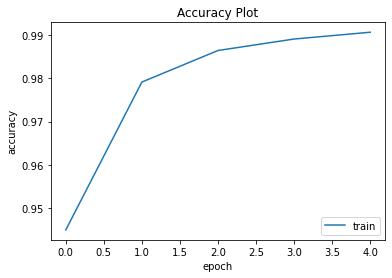

In [27]:
# accuracy plot
plt.plot(history.history['accuracy'])
plt.title("Accuracy Plot")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

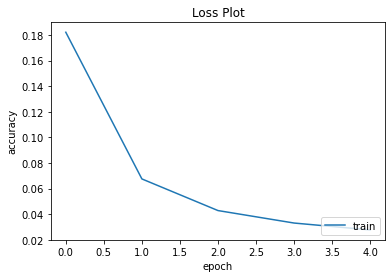

In [28]:
# loss plot
plt.plot(history.history['loss'])
plt.title("Loss Plot")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

Text(0.5, 0, '0')

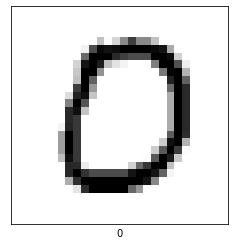

In [32]:
# lets predict on testing data

img = X_test[10]
plt.imshow(img.reshape(28, 28), cmap = 'binary')
plt.xticks([])
plt.yticks([])
plt.xlabel(np.argmax(y_test[10]))

In [33]:
pred = model.predict(img.reshape(-1, 28, 28, 1))
print(pred)

[[1.00000000e+00 1.17303415e-11 5.98010141e-10 4.48707369e-13
  7.05793627e-12 5.77016343e-12 7.99193778e-09 6.61382190e-12
  1.45538928e-10 2.54805926e-10]]


In [35]:
print("Predicted digit : ", np.argmax(pred))

Predicted digit :  0


# EXPLORATION PART

In [40]:
## Number of filters

filters = [4, 32, 64, 128]
models_filter, history_filter = [], []

for i, f in enumerate(filters):
    model = Sequential()
    model.add(Conv2D(filters = f, kernel_size = (3, 3), strides = 1, activation = 'relu', input_shape = (28, 28, 1)))
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(Flatten())
    model.add(Dense(num_classes, activation = 'softmax'))
    
    # model summary
    models_filter.append(model)
    # compiling the model
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    # fitting the model on training data
    hist = model.fit(X_train, y_train, epochs = 5, batch_size = 256, verbose = 0)
    history_filter.append(hist)
    # evaluation on the training data.
    score = model.evaluate(X_train, y_train)
    print("Model : ", i)
    print("Training loss : ", score[0])
    print("Training accuracy : ", score[1])
    print("-------------------------------------------------")    


1875/1875 [==============================] - 3s 2ms/step - loss: 0.2334 - accuracy: 0.9328: 0s - loss: 0.2337 - accuracy: 0.93
Model :  0
Training loss :  0.23344172537326813
Training accuracy :  0.9328166842460632
-------------------------------------------------
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0617 - accuracy: 0.9839
Model :  1
Training loss :  0.06166253611445427
Training accuracy :  0.9839333295822144
-------------------------------------------------
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0489 - accuracy: 0.9865
Model :  2
Training loss :  0.04889789596199989
Training accuracy :  0.9865166544914246
-------------------------------------------------
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0387 - accuracy: 0.9891
Model :  3
Training loss :  0.03872886672616005
Training accuracy :  0.9890999794006348
-------------------------------------------------


We observe that with the increase in the number of filters the model accuracy increases as more features are captured by different features.

In [43]:
# plotting the model summaries

for i, model in enumerate(models_filter):
    print("No. of filters = ", filters[i])
    model.summary()
    print("-------------------------------------------------------------")

No. of filters =  4
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 4)         40        
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 4)         0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 676)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                6770      
Total params: 6,810
Trainable params: 6,810
Non-trainable params: 0
_________________________________________________________________
-------------------------------------------------------------
No. of filters =  32
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Pa

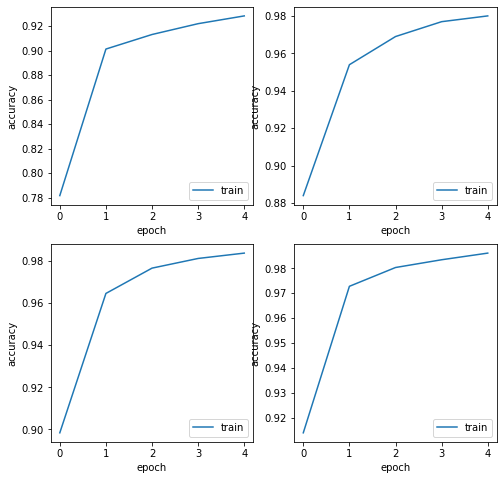

In [49]:
# plotting the accuracy curve

plt.figure(figsize = (8, 8))
for i in range(len(history_filter)):
    plt.subplot(2, 2, i + 1)
    plt.plot(history_filter[i].history['accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='lower right')
plt.show()

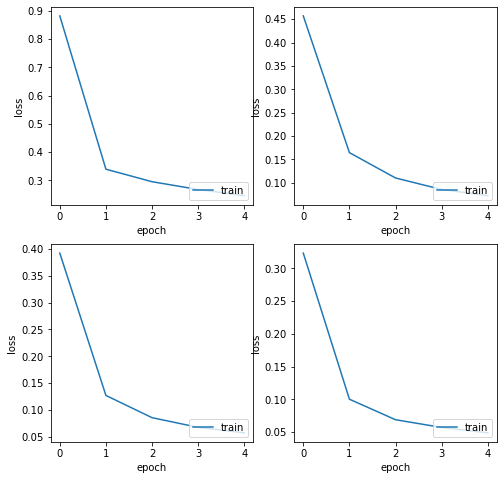

In [45]:
# plotting the loss curve

plt.figure(figsize = (8, 8))
for i in range(len(history_filter)):
    plt.subplot(2, 2, i + 1)
    plt.plot(history_filter[i].history['loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='lower right')
plt.show()

In [52]:
# number of layers

layers = [1, 2, 3, 4]
models_layer, history_layer = [], []

for i, layer in enumerate(layers):
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, activation = 'relu', input_shape = (28, 28, 1)))
    for j in range(layer - 1):
        model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, activation = 'relu'))
    
    model.add(Flatten())
    model.add(Dense(num_classes, activation = 'softmax'))
    # model summary
    models_layer.append(model)
    # compiling the model
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    # fitting the model on training data
    hist = model.fit(X_train, y_train, epochs = 5, batch_size = 256, verbose = 0)
    history_layer.append(hist)
    # evaluation on the training data.
    score = model.evaluate(X_train, y_train)
    print("Model : ", i)
    print("Training loss : ", score[0])
    print("Training accuracy : ", score[1])
    print("-------------------------------------------------") 


1875/1875 [==============================] - 3s 2ms/step - loss: 0.0421 - accuracy: 0.9880
Model :  0
Training loss :  0.04209303855895996
Training accuracy :  0.9879500269889832
-------------------------------------------------
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0272 - accuracy: 0.9918
Model :  1
Training loss :  0.027188584208488464
Training accuracy :  0.9918333292007446
-------------------------------------------------
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0238 - accuracy: 0.9926
Model :  2
Training loss :  0.023818181827664375
Training accuracy :  0.9926166534423828
-------------------------------------------------
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0154 - accuracy: 0.9955
Model :  3
Training loss :  0.015432275831699371
Training accuracy :  0.9954500198364258
-------------------------------------------------


In [53]:
# plotting the model summaries

for i, model in enumerate(models_filter):
    print("No. of Conv Layers = ", layers[i])
    model.summary()
    print("-------------------------------------------------------------")

No. of Conv Layers =  1
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 4)         40        
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 4)         0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 676)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                6770      
Total params: 6,810
Trainable params: 6,810
Non-trainable params: 0
_________________________________________________________________
-------------------------------------------------------------
No. of Conv Layers =  2
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape         

Again we can observe that with the increase in the number of layers, the model accuracy increases a bit. Also the amount of trainable parameters increases a lot thereby increasing the training time.

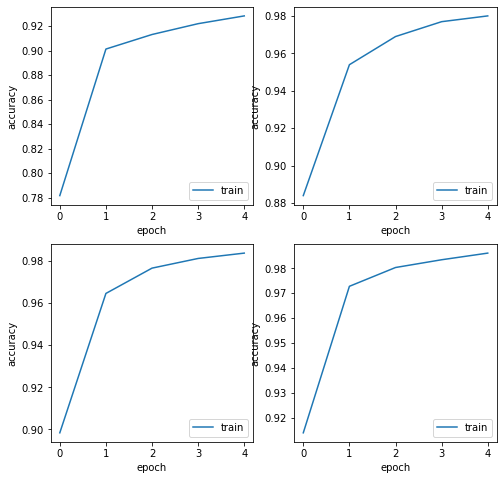

In [54]:
# plotting the accuracy curve

plt.figure(figsize = (8, 8))
for i in range(len(history_filter)):
    plt.subplot(2, 2, i + 1)
    plt.plot(history_filter[i].history['accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='lower right')
plt.show()

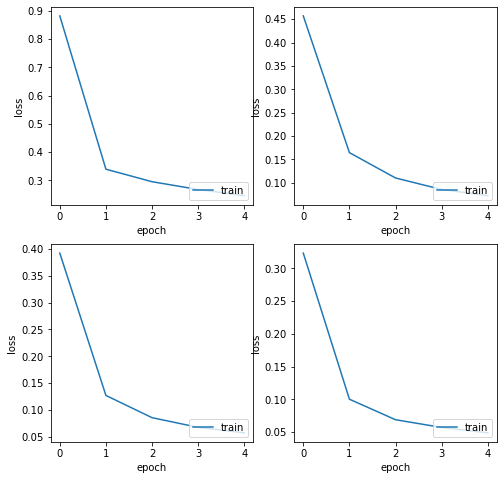

In [55]:
# plotting the loss curve

plt.figure(figsize = (8, 8))
for i in range(len(history_filter)):
    plt.subplot(2, 2, i + 1)
    plt.plot(history_filter[i].history['loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='lower right')
plt.show()

Text(0.5, 0, 'Actual digit : 9')

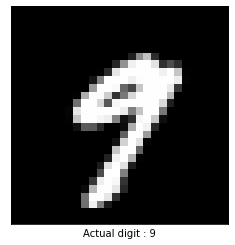

In [64]:
# testing on unseen data

img = X_test[20]
plt.imshow(img.reshape(28, 28), cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.xlabel("Actual digit : " + str(np.argmax(y_test[20])))

In [72]:
for i, model in enumerate(models_filter):
    pred = model.predict(img.reshape(-1, 28, 28, 1))
    print("Model : ", i + 1)
    print("No of filters : ", filters[i])
    print("Predicted digit : ", np.argmax(pred))
    print("----------------------------------------")

Model :  1
No of filters :  4
Predicted digit :  9
----------------------------------------
Model :  2
No of filters :  32
Predicted digit :  9
----------------------------------------
Model :  3
No of filters :  64
Predicted digit :  9
----------------------------------------
Model :  4
No of filters :  128
Predicted digit :  9
----------------------------------------


In [71]:
for i, model in enumerate(models_filter):
    pred = model.predict(img.reshape(-1, 28, 28, 1))
    print("Model : ", i + 1)
    print("No of layers : ", layers[i])
    print("Predicted digit : ", np.argmax(pred))
    print("----------------------------------------")

Model :  1
No of layers :  1
Predicted digit :  9
----------------------------------------
Model :  2
No of layers :  2
Predicted digit :  9
----------------------------------------
Model :  3
No of layers :  3
Predicted digit :  9
----------------------------------------
Model :  4
No of layers :  4
Predicted digit :  9
----------------------------------------
